In [1]:
import os
import json
import time
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Literal

Snapnums = Literal["000", "001", "002", "003", "004"]

graphs_root: str = './quijote/grafos'  # Cambiar si es necesario
metrics_path: str = f'{graphs_root}/metrics.json'

assert os.path.exists(metrics_path)

with open(metrics_path) as json_data:
    data: dict = json.load(json_data)

In [26]:
# Convertir toda la información de las métricas en algo más legible
simus_col: list[str] = []
realizations_col: list[str] = []
snapnums_col: list[str] = []
global_efficiency_col: list[float] = []
local_efficiencies_col: list[list[float]] = []
avg_local_efficiencies_col: list[float] = []
entropy_col: list[float] = []
hurst_col: list[float] = []
closeness_col: list[list[float]] = []
betweenness_col: list[list[float]] = []
eigenvector_col: list[list[float]] = []
convergence_col: list[list[float]] = []
n_nodes: list[int] = []

t0 = time.perf_counter()

for simu, realizations in data.items():
    print(simu)
    
    if simu != 'randoms':
        for realization, snapnums in realizations.items():
            for snapnum, metrics in snapnums.items():
                g = ig.Graph.Read_GraphML(f'{graphs_root}/{simu}/{realization}/{simu}_{snapnum}.graphml.xml')

                simus_col.append(simu)
                realizations_col.append(realization)
                snapnums_col.append(snapnum)
                if "global_efficiency" in metrics:
                    global_efficiency_col.append(metrics["global_efficiency"])
                else:
                    global_efficiency_col.append(0.0)
                local_efficiencies_col.append(metrics["local_efficiencies"])
                avg_local_efficiencies_col.append(metrics["avg_local_efficiency"])
                entropy_col.append(metrics["entropy"])
                hurst_col.append(metrics["hurst"])
                closeness_col.append(metrics["closeness"])
                betweenness_col.append(metrics["betweenness"])
                eigenvector_col.append(metrics["eigenvector"])
                convergence_col.append(metrics["convergence"])
                n_nodes.append(len(g.vs))
    else:
        for snapnum, metrics in data[simu].items():
            g = ig.Graph.Read_GraphML(f'{graphs_root}/{simu}/random_{snapnum}.graphml.xml')

            simus_col.append(simu)
            realizations_col.append("0")
            snapnums_col.append(snapnum)
            if "global_efficiency" in metrics:
                global_efficiency_col.append(metrics["global_efficiency"])
            else:
                global_efficiency_col.append(0.0)
            local_efficiencies_col.append(metrics["local_efficiencies"])
            avg_local_efficiencies_col.append(metrics["avg_local_efficiency"])
            entropy_col.append(metrics["entropy"])
            hurst_col.append(metrics["hurst"])
            closeness_col.append(metrics["closeness"])
            betweenness_col.append(metrics["betweenness"])
            eigenvector_col.append(metrics["eigenvector"])
            convergence_col.append(metrics["convergence"])
            n_nodes.append(len(g.vs))

print(f'\nTiempo total: {time.perf_counter() - t0} segundos')

h_m
DC_m
DC_p
fiducial
randoms
Mnu_p
Mnu_ppp
Mnu_pp
s8_m
s8_p

Tiempo total: 25.84235489099956 segundos


In [3]:
df: pd.DataFrame = pd.DataFrame({
    "simulation": simus_col,
    "realization": realizations_col,
    "snapnum": snapnums_col,
    "nodes": n_nodes,
    "global_efficiency": global_efficiency_col,
    "local_efficiencies": local_efficiencies_col,
    "avg_local_efficiencies": avg_local_efficiencies_col,
    "entropy": entropy_col,
    "hurst": hurst_col,
    "closeness": closeness_col,
    "betweenness": betweenness_col,
    "eigenvector": eigenvector_col,
    "convergence": convergence_col
})

In [4]:
# Obtener nuevas métricas globales a partir de las listas
for local_metric_str in ['closeness', 'betweenness',
                     'eigenvector', 'convergence']:
    local_metric = df[local_metric_str].tolist()
    avgs = [np.mean(local) for local in local_metric]
    df[f'avg_{local_metric_str}'] = avgs

In [5]:
df

,simulation,realization,snapnum,nodes,global_efficiency,local_efficiencies,avg_local_efficiencies,entropy,hurst,closeness,betweenness,eigenvector,convergence,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,000,4717,0.169980,"[0.6321428571428569, 0.675, 0.6557734204793026...",0.697417,8.419964,0.491321,"[0.0017965096857643719, 0.0011612027784065183,...","[130712.0, 2187.0, 27464.0, 7766.0, 7550.0, 48...","[3.6589114179022966e-07, 0.002452992681506109,...","[0.6165960024227741, 0.6949253731343283, 0.327...",0.001427,20712.960568,0.002694,0.544165
1,h_m,101,001,42999,0.000000,"[0.7197802197802198, 0.7666666666666667, 0.703...",0.699703,10.622198,0.503485,"[0.001318497209475962, 0.0015031817608753273, ...","[440593.0, 101676.0, 45321.0, 273106.0, 67880....","[1.9382343436521035e-09, 1.7342312928906623e-0...","[0.7582226762002043, 0.9978176934698674, 0.654...",0.001427,400786.036361,0.000239,0.669723
2,h_m,10,000,4665,0.169432,"[0.6601307189542481, 0.7888888888888889, 0.751...",0.697986,8.407886,0.518865,"[0.001355045358612164, 0.001343512920109291, 0...","[9735.0, 5022.0, 48778.0, 52205.0, 25796.0, 30...","[0.0007515010670393662, 0.0019349976754350511,...","[0.8409884501745903, 0.7777777777777778, 0.057...",0.001425,20516.372776,0.002693,0.537689
3,h_m,10,001,42659,0.000000,"[0.7272727272727273, 0.7234432234432235, 0.700...",0.699867,10.614346,0.500565,"[0.0015095993415628868, 0.00124795205734622, 0...","[602608.0, 17700.0, 173192.0, 26444.0, 88969.0...","[7.899082034407834e-13, 8.658450335801845e-06,...","[0.23466438282839097, 0.0554315115037375, 0.53...",0.001435,397751.303805,0.000223,0.656719
4,h_m,1,000,4612,0.168439,"[0.7916666666666666, 0.6556372549019607, 0.675...",0.697628,8.398674,0.483871,"[0.001282839274378569, 0.0014041920301318131, ...","[1107.0, 13235.0, 1148.0, 31714.0, 17121.0, 69...","[2.6369605509129264e-05, 0.0004009996185762696...","[0.9981296758104738, 0.9962335216572504, 0.996...",0.001419,20275.446227,0.002206,0.530748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,s8_p,1,000,5836,0.159356,"[0.6831501831501832, 0.8055555555555556, 0.684...",0.696549,8.632653,0.480432,"[0.0012896002042594977, 0.0013881123466369728,...","[13092.0, 4791.0, 9385.0, 16745.0, 5306.0, 414...","[0.00034301433364351206, 0.000309895983215718,...","[0.7373650107991361, 0.011282051282051283, 0.9...",0.001417,27876.164154,0.002421,0.541029
128,s8_p,101,000,5998,0.160174,"[0.8333333333333334, 0.6752450980392155, 0.760...",0.697624,8.659660,0.554412,"[0.0011643886765124987, 0.0012192797776034228,...","[717.0, 10209.0, 10138.0, 8962.0, 896.0, 71332...","[0.0013997504150172094, 0.00019898327151131147...","[0.8809523809523809, 0.9944071588366891, 0.925...",0.001430,28669.629543,0.001968,0.555461
129,s8_p,103,000,6096,0.159888,"[0.7032967032967034, 0.656862745098039, 0.7370...",0.697378,8.675749,0.517301,"[0.0014005760509703154, 0.001491121532007737, ...","[12861.0, 47243.0, 23269.0, 6258.0, 5485.0, 72...","[9.375688857529681e-07, 0.000299454603694843, ...","[0.797877716018191, 0.9732620320855615, 0.3578...",0.001421,29367.767388,0.001273,0.562656
130,s8_p,106,000,5866,0.160275,"[0.8, 0.7870370370370371, 0.6904761904761905, ...",0.697790,8.636512,0.540718,"[0.001365786799080098, 0.0016437518356814354, ...","[2755.0, 11624.0, 114447.0, 37117.0, 1639.0, 7...","[6.073970459847066e-05, 1.2168365880920925e-06...","[0.9326666666666666, 0.9801488833746899, 0.902...",0.001425,27843.368565,0.002380,0.551900


In [6]:
global_metrics: list[str] = [
    "global_efficiency", "avg_local_efficiencies",
    "entropy", "hurst", "avg_closeness", "avg_betweenness", 
    "avg_eigenvector", "avg_convergence"
]

# Normalizar
normalized_df = df.copy()
for global_metric in global_metrics:
    normalized_df[global_metric] /= normalized_df["nodes"]

In [7]:
normalized_df

,simulation,realization,snapnum,nodes,global_efficiency,local_efficiencies,avg_local_efficiencies,entropy,hurst,closeness,betweenness,eigenvector,convergence,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,000,4717,0.000036,"[0.6321428571428569, 0.675, 0.6557734204793026...",0.000148,0.001785,0.000104,"[0.0017965096857643719, 0.0011612027784065183,...","[130712.0, 2187.0, 27464.0, 7766.0, 7550.0, 48...","[3.6589114179022966e-07, 0.002452992681506109,...","[0.6165960024227741, 0.6949253731343283, 0.327...",3.026152e-07,4.391130,5.712061e-07,0.000115
1,h_m,101,001,42999,0.000000,"[0.7197802197802198, 0.7666666666666667, 0.703...",0.000016,0.000247,0.000012,"[0.001318497209475962, 0.0015031817608753273, ...","[440593.0, 101676.0, 45321.0, 273106.0, 67880....","[1.9382343436521035e-09, 1.7342312928906623e-0...","[0.7582226762002043, 0.9978176934698674, 0.654...",3.319761e-08,9.320822,5.564601e-09,0.000016
2,h_m,10,000,4665,0.000036,"[0.6601307189542481, 0.7888888888888889, 0.751...",0.000150,0.001802,0.000111,"[0.001355045358612164, 0.001343512920109291, 0...","[9735.0, 5022.0, 48778.0, 52205.0, 25796.0, 30...","[0.0007515010670393662, 0.0019349976754350511,...","[0.8409884501745903, 0.7777777777777778, 0.057...",3.055521e-07,4.397936,5.772182e-07,0.000115
3,h_m,10,001,42659,0.000000,"[0.7272727272727273, 0.7234432234432235, 0.700...",0.000016,0.000249,0.000012,"[0.0015095993415628868, 0.00124795205734622, 0...","[602608.0, 17700.0, 173192.0, 26444.0, 88969.0...","[7.899082034407834e-13, 8.658450335801845e-06,...","[0.23466438282839097, 0.0554315115037375, 0.53...",3.362751e-08,9.323972,5.231571e-09,0.000015
4,h_m,1,000,4612,0.000037,"[0.7916666666666666, 0.6556372549019607, 0.675...",0.000151,0.001821,0.000105,"[0.001282839274378569, 0.0014041920301318131, ...","[1107.0, 13235.0, 1148.0, 31714.0, 17121.0, 69...","[2.6369605509129264e-05, 0.0004009996185762696...","[0.9981296758104738, 0.9962335216572504, 0.996...",3.075696e-07,4.396237,4.782990e-07,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,s8_p,1,000,5836,0.000027,"[0.6831501831501832, 0.8055555555555556, 0.684...",0.000119,0.001479,0.000082,"[0.0012896002042594977, 0.0013881123466369728,...","[13092.0, 4791.0, 9385.0, 16745.0, 5306.0, 414...","[0.00034301433364351206, 0.000309895983215718,...","[0.7373650107991361, 0.011282051282051283, 0.9...",2.428239e-07,4.776587,4.148067e-07,0.000093
128,s8_p,101,000,5998,0.000027,"[0.8333333333333334, 0.6752450980392155, 0.760...",0.000116,0.001444,0.000092,"[0.0011643886765124987, 0.0012192797776034228,...","[717.0, 10209.0, 10138.0, 8962.0, 896.0, 71332...","[0.0013997504150172094, 0.00019898327151131147...","[0.8809523809523809, 0.9944071588366891, 0.925...",2.383600e-07,4.779865,3.281063e-07,0.000093
129,s8_p,103,000,6096,0.000026,"[0.7032967032967034, 0.656862745098039, 0.7370...",0.000114,0.001423,0.000085,"[0.0014005760509703154, 0.001491121532007737, ...","[12861.0, 47243.0, 23269.0, 6258.0, 5485.0, 72...","[9.375688857529681e-07, 0.000299454603694843, ...","[0.797877716018191, 0.9732620320855615, 0.3578...",2.330336e-07,4.817547,2.087882e-07,0.000092
130,s8_p,106,000,5866,0.000027,"[0.8, 0.7870370370370371, 0.6904761904761905, ...",0.000119,0.001472,0.000092,"[0.001365786799080098, 0.0016437518356814354, ...","[2755.0, 11624.0, 114447.0, 37117.0, 1639.0, 7...","[6.073970459847066e-05, 1.2168365880920925e-06...","[0.9326666666666666, 0.9801488833746899, 0.902...",2.429095e-07,4.746568,4.056609e-07,0.000094


## Gráficas

### Histogramas de las métricas locales

In [8]:
def to_flattenarray(df: pd.DataFrame, simulation: str, snapnum: Snapnums, metric_label: str) -> list[float]:
    subdf: pd.DataFrame = df.loc[(df["simulation"] == simulation) &
                                 (df["snapnum"] == snapnum)].reset_index()
    metric: pd.Series = subdf[metric_label]

    if type(metric[0]) != list:
        raise ValueError(f"La métrica {metric_label} no es local!")
    
    flatten_array: list[float] = []
    for sub_list in metric:
        flatten_array.extend(sub_list)

    return flatten_array


#### `snapnums`

In [9]:
def plot_local_metric(df: pd.DataFrame, snapnum: Snapnums, metric_label: str, ax) -> None:
    simulations_col = list(df["simulation"].unique())
    arrays = [to_flattenarray(df, simulation, snapnum, metric_label)
              for simulation in simulations_col]

    for i, simu in enumerate(simulations_col):
        if metric_label == 'eigenvector':
            arrays[i] = list(filter(lambda x: x > 1e-3, arrays[i]))

        subdf = pd.DataFrame({"data": arrays[i]})
        sns.histplot(subdf, x='data', stat='density', log_scale=True,
                     kde=True, label=simu, ax=ax)
        
    ax.set(title=metric_label, xlabel=None, ylabel=None)
    ax.legend(title="Simulation")
    

def plot_local_metrics(snapnum: Snapnums) -> None:
    fig, axes = plt.subplots(3, 2, figsize=(16, 9))

    gs = axes[2, 0].get_gridspec()
    for ax in axes[2, :]:
        ax.remove()

    axbig = fig.add_subplot(gs[2, :])

    plot_local_metric(df, snapnum, "local_efficiencies", axes[0, 0])
    plot_local_metric(df, snapnum, "closeness", axes[0, 1])
    plot_local_metric(df, snapnum, "betweenness", axes[1, 0])
    plot_local_metric(df, snapnum, "convergence", axes[1, 1])
    plot_local_metric(df, snapnum, "eigenvector", axbig)

    fig.suptitle(f'Histogramas para $snapnum = {snapnum}$')

    fig.tight_layout()
    plt.show()

/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


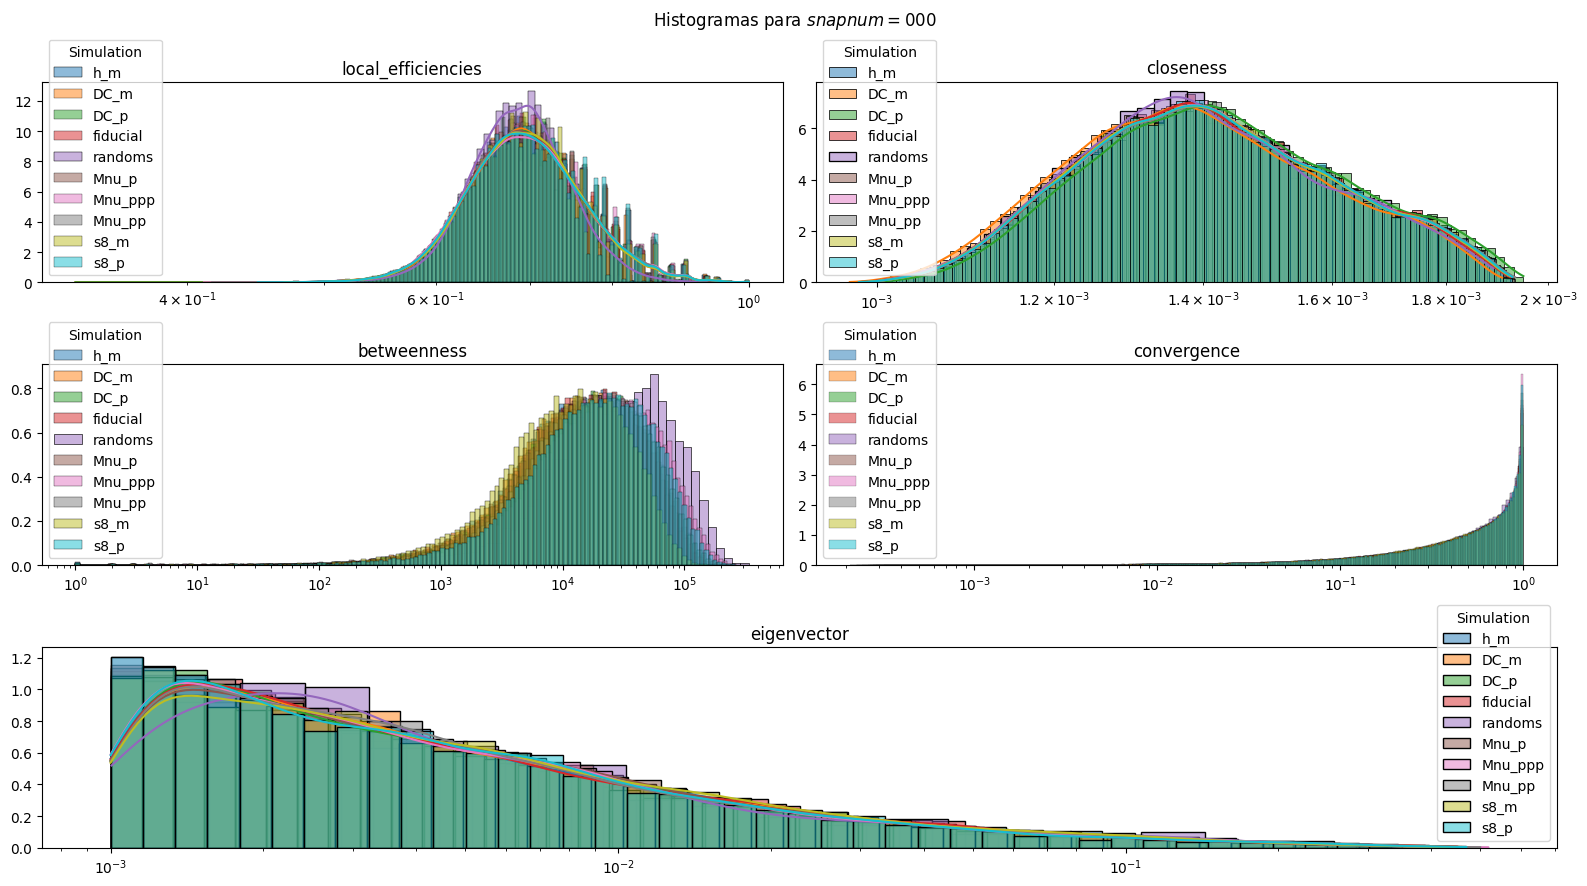

In [10]:
plot_local_metrics("000")

In [ ]:
# NO EJECUTAR! Se demora 1000 siglos y finalmente no hace nada. Así que no vale la pena
plot_local_metrics("001")

### Boxplots & Violinplots de las métricas globales

#### Sin normalizar

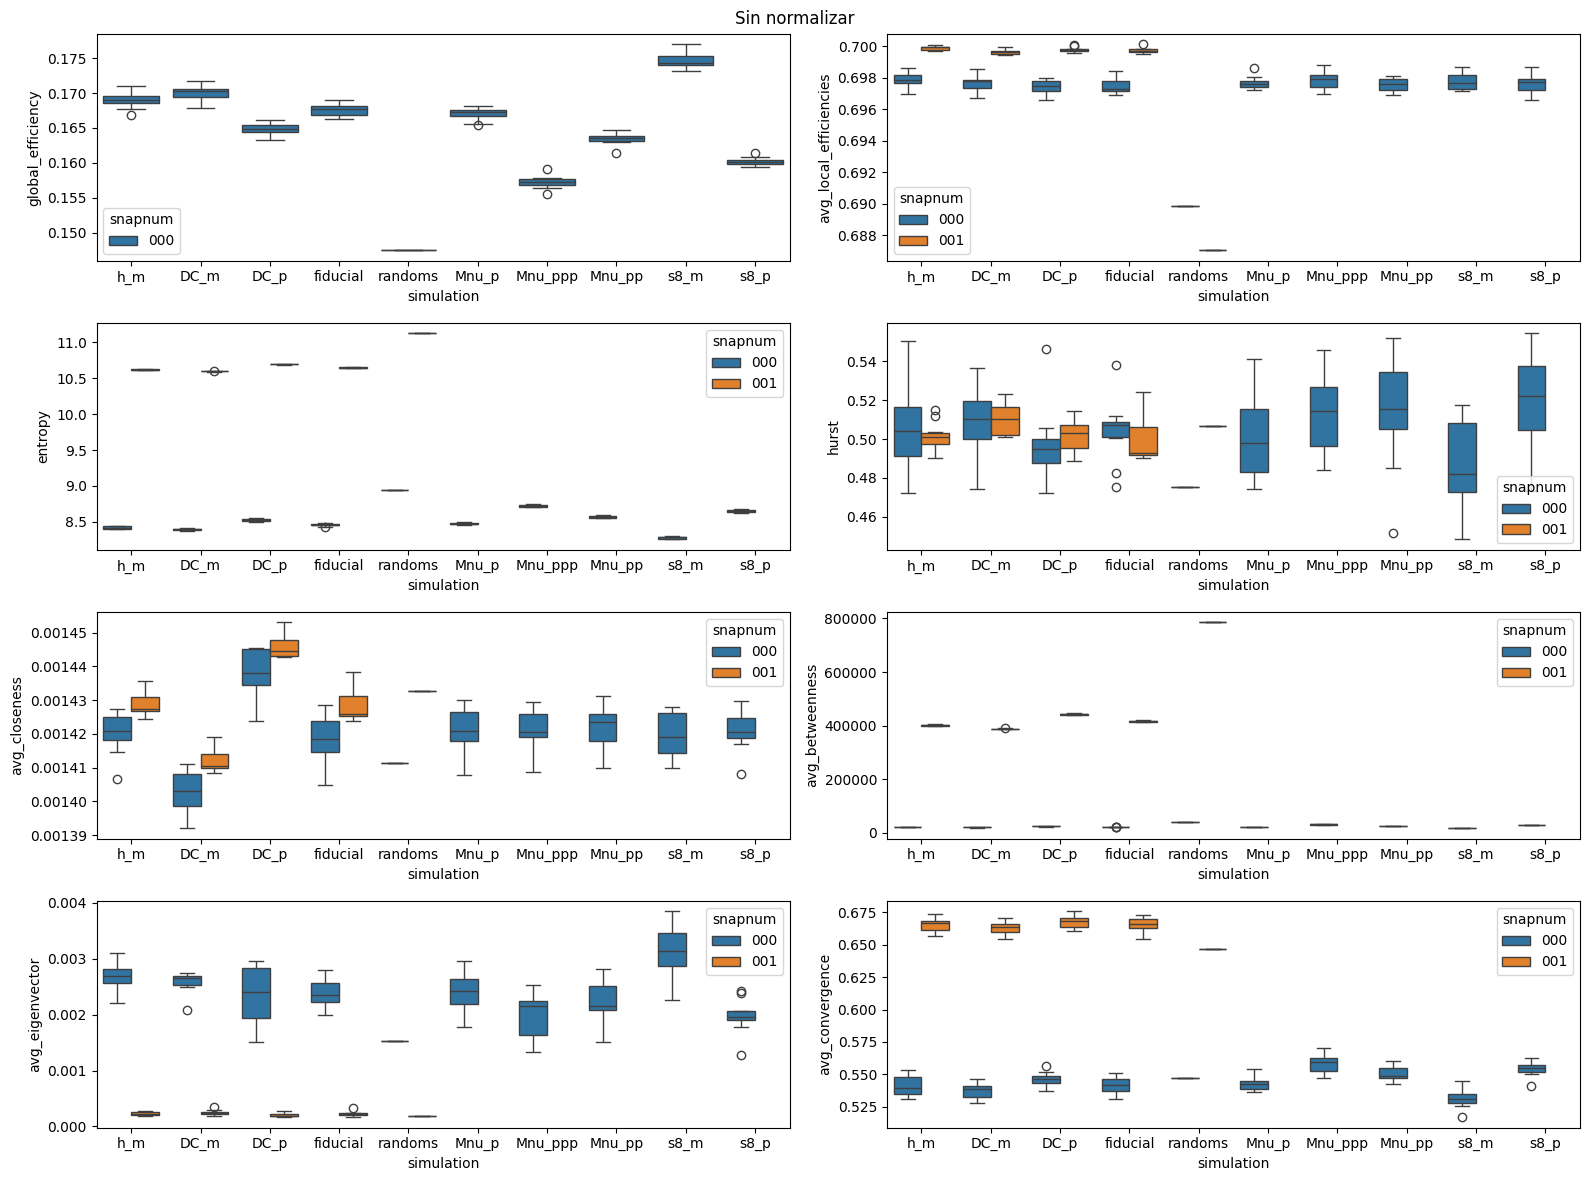

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.boxplot(df, x='simulation', y=metric, hue='snapnum', ax=ax)
    else:
        sns.boxplot(df[df["snapnum"] == "000"], x='simulation', y=metric, hue='snapnum', ax=ax)

fig.suptitle('Sin normalizar')
fig.tight_layout()
plt.show()

/tmp/ipykernel_103286/297893349.py:7: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.violinplot(df[df["snapnum"] == "000"], x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
/tmp/ipykernel_103286/297893349.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
/tmp/ipykernel_103286/297893349.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
/tmp/ipykernel_103286/297893349.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart',

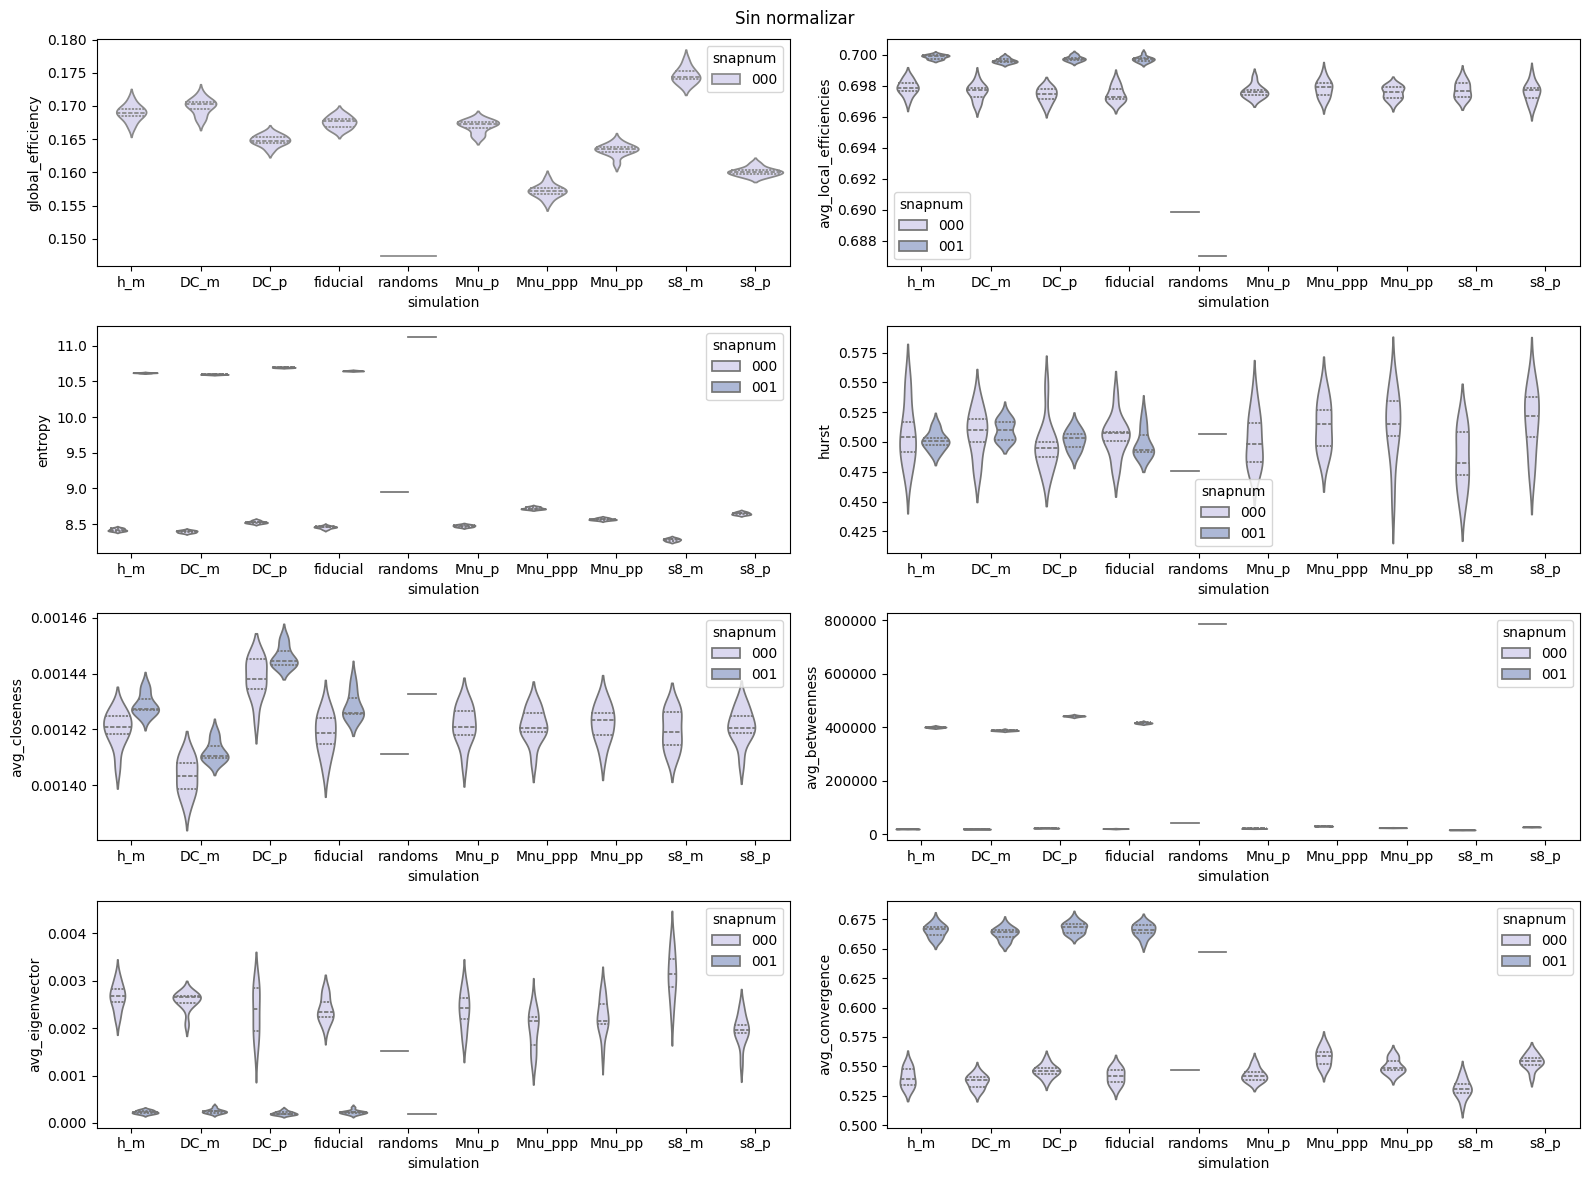

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
    else:
        sns.violinplot(df[df["snapnum"] == "000"], x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)

fig.suptitle('Sin normalizar')
fig.tight_layout()
plt.show()

#### Normalizar

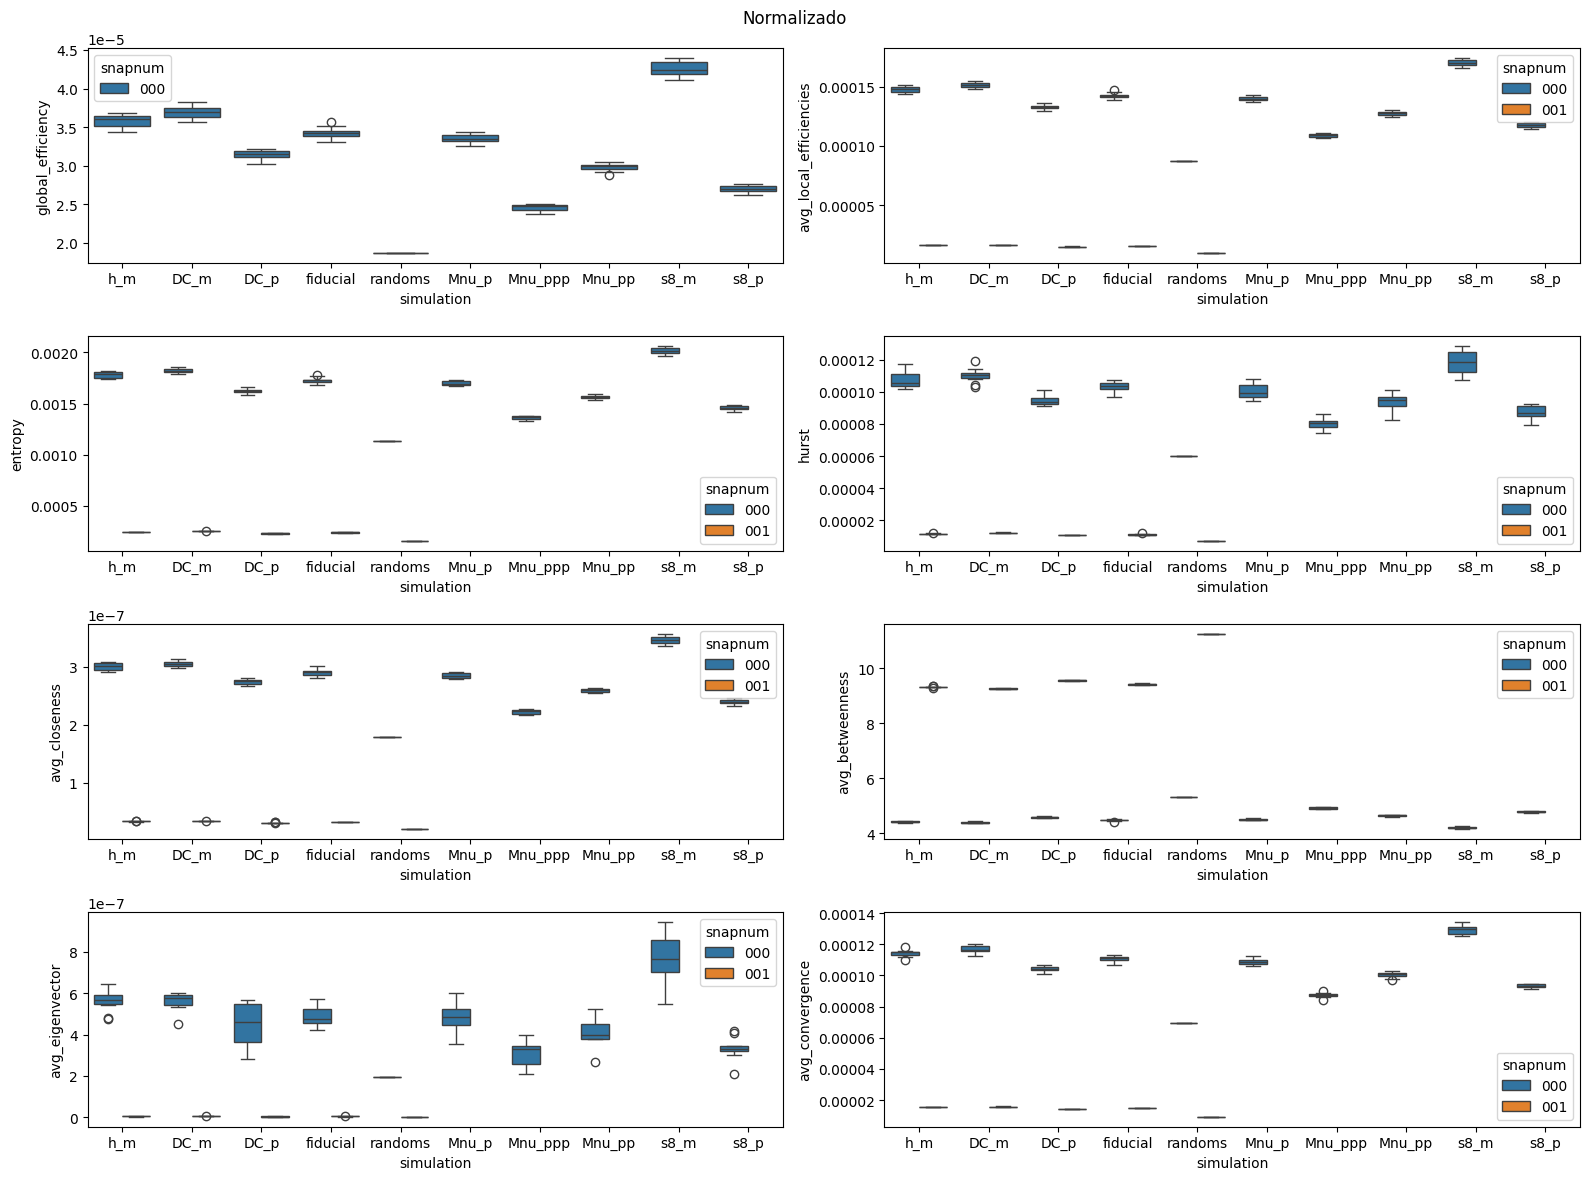

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.boxplot(normalized_df, x='simulation',
                    y=metric, hue='snapnum', ax=ax)
    else:
        sns.boxplot(normalized_df[normalized_df["snapnum"] == "000"],
                    x='simulation', y=metric, hue='snapnum', ax=ax)

fig.suptitle('Normalizado')
fig.tight_layout()
plt.show()

/tmp/ipykernel_103286/2792159413.py:8: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.violinplot(normalized_df[normalized_df["snapnum"] == "000"],
/tmp/ipykernel_103286/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_103286/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_103286/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_103286/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_103286/2792159413.py:

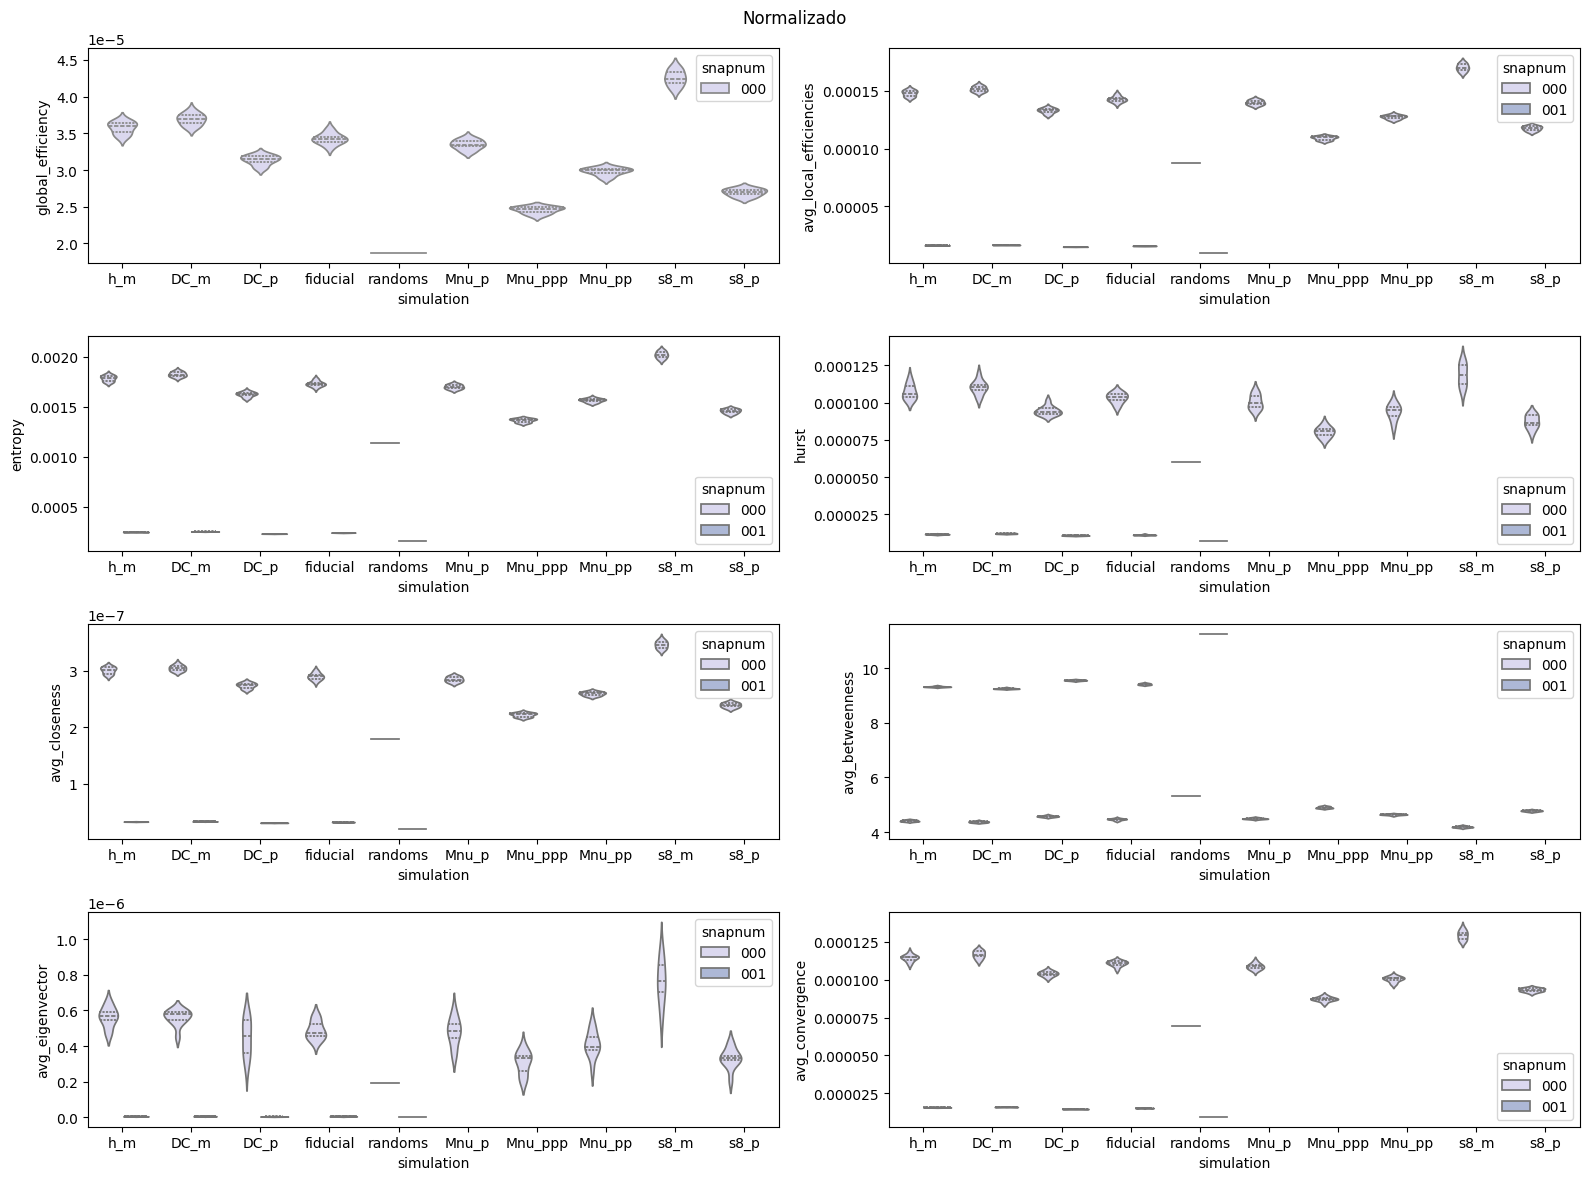

In [15]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.violinplot(normalized_df, x='simulation', y=metric,
                       hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
    else:
        sns.violinplot(normalized_df[normalized_df["snapnum"] == "000"],
                       x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)

fig.suptitle('Normalizado')
fig.tight_layout()
plt.show()

# Comparación con los aleatorios

In [16]:
def comparate_randoms(df: pd.DataFrame, snapnum: Snapnums, func: callable = None) -> pd.DataFrame:
    if func is None:
        func = lambda dd, rr: dd/rr

    cols = ["simulation", "realization", *global_metrics]
    randoms = df.loc[(df["simulation"] == "randoms") &
                     (df["snapnum"] == snapnum)].reset_index()
    sub_df = df.loc[(df["snapnum"] == snapnum) &
                    (df["simulation"] != "randoms")].reset_index()

    sub_df = sub_df[cols]
    randoms = randoms[cols]

    ratio_df = pd.DataFrame(columns=cols)

    for i in range(len(sub_df)):
        data = list(func(sub_df.loc[i, global_metrics], randoms.loc[0, global_metrics]))
        ratio_df.loc[i] = [*list(sub_df.loc[i, cols[:2]]), *data]

    return ratio_df


def plot_ratio(df: pd.DataFrame, snapnum: Snapnums, func: callable = None, title: str = '') -> None:
    ratio = comparate_randoms(df, snapnum, func)

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

    if snapnum == "000":
        sns.boxplot(ratio, y='global_efficiency', hue='simulation', ax=ax1)

    for metric, ax in zip(global_metrics[1:], (ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
        sns.boxplot(ratio, y=metric, hue='simulation', ax=ax)

    fig.suptitle(title)
    fig.tight_layout()

    plt.show()

In [17]:
ratio_func1 = lambda dd, rr: dd/rr
ratio_func2 = lambda dd, rr: (dd - rr) / (dd + rr)

## Sin normalizar

### Función del ratio: $r = \frac{dd}{rr}$

Donde $dd$ son los datos reales y $rr$ son los datos de esa métrica aleatorios (provenientes de randoms)

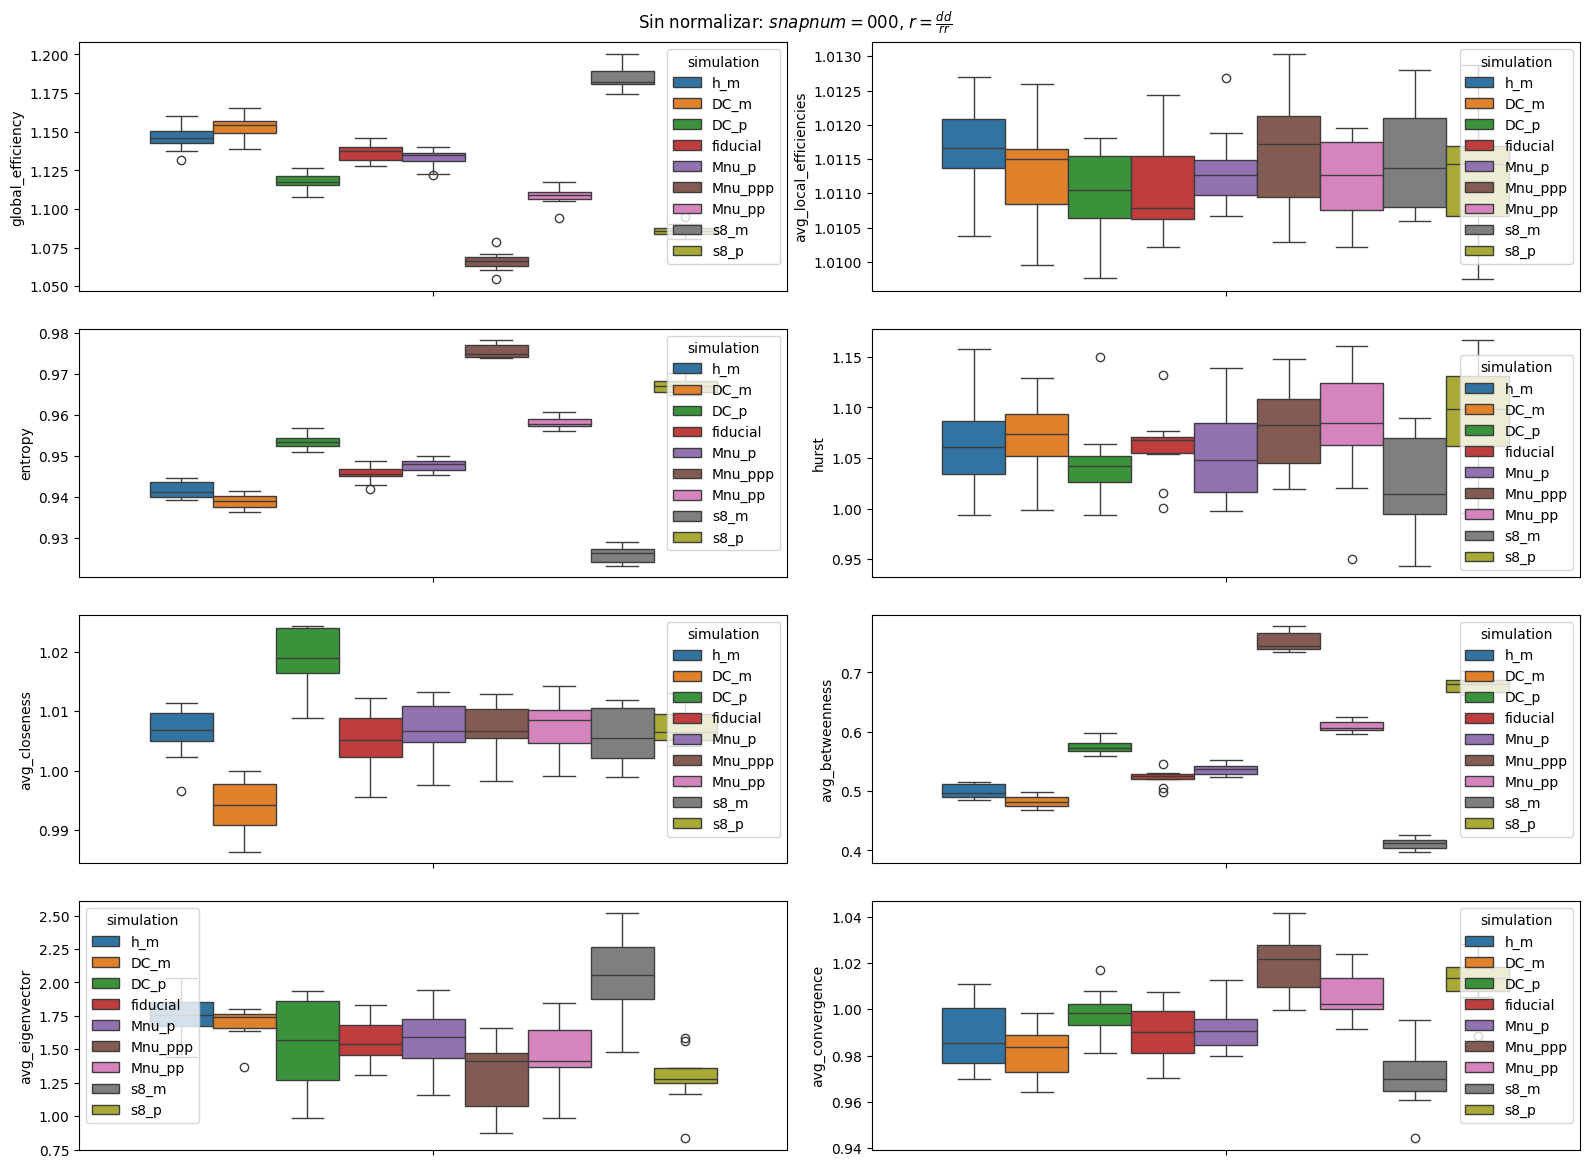

In [18]:
plot_ratio(df, "000", ratio_func1, r"Sin normalizar: $snapnum=000$, $r=\frac{dd}{rr}$")

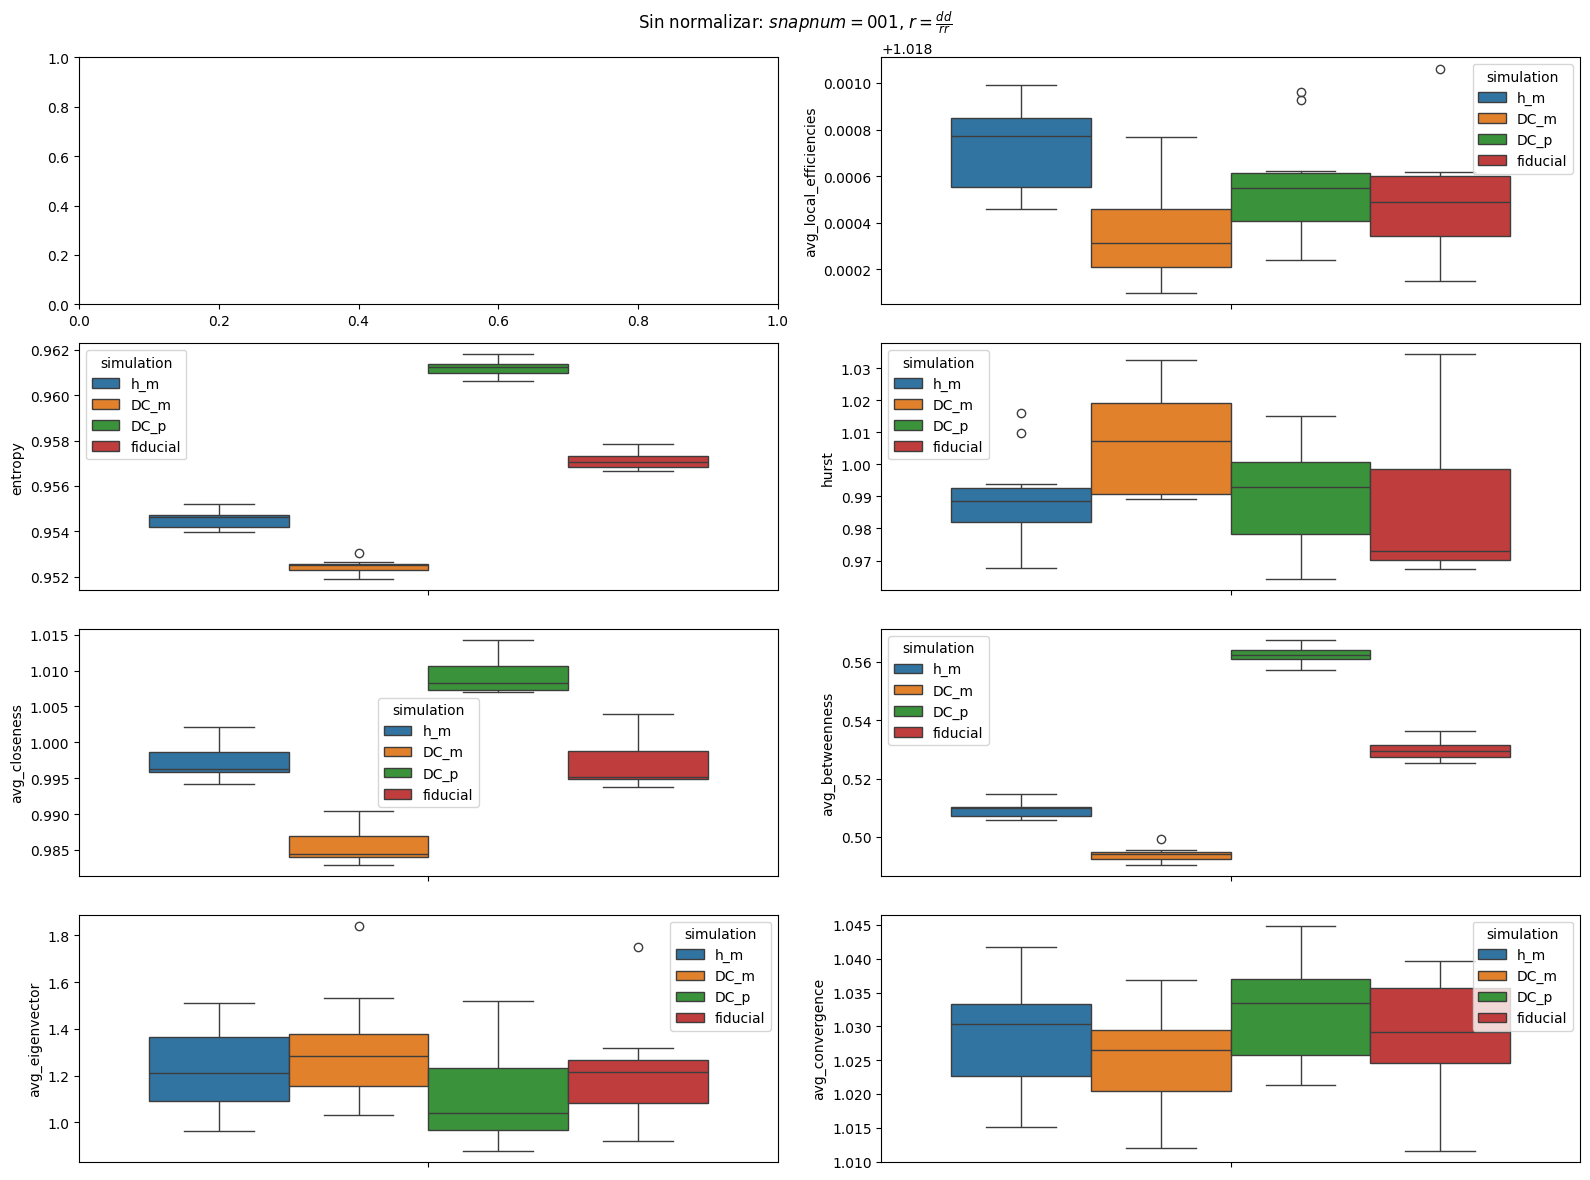

In [19]:
plot_ratio(df, "001", ratio_func1, r"Sin normalizar: $snapnum=001$, $r=\frac{dd}{rr}$")

### Función del ratio: $r = \frac{dd - rr}{dd + rr}$

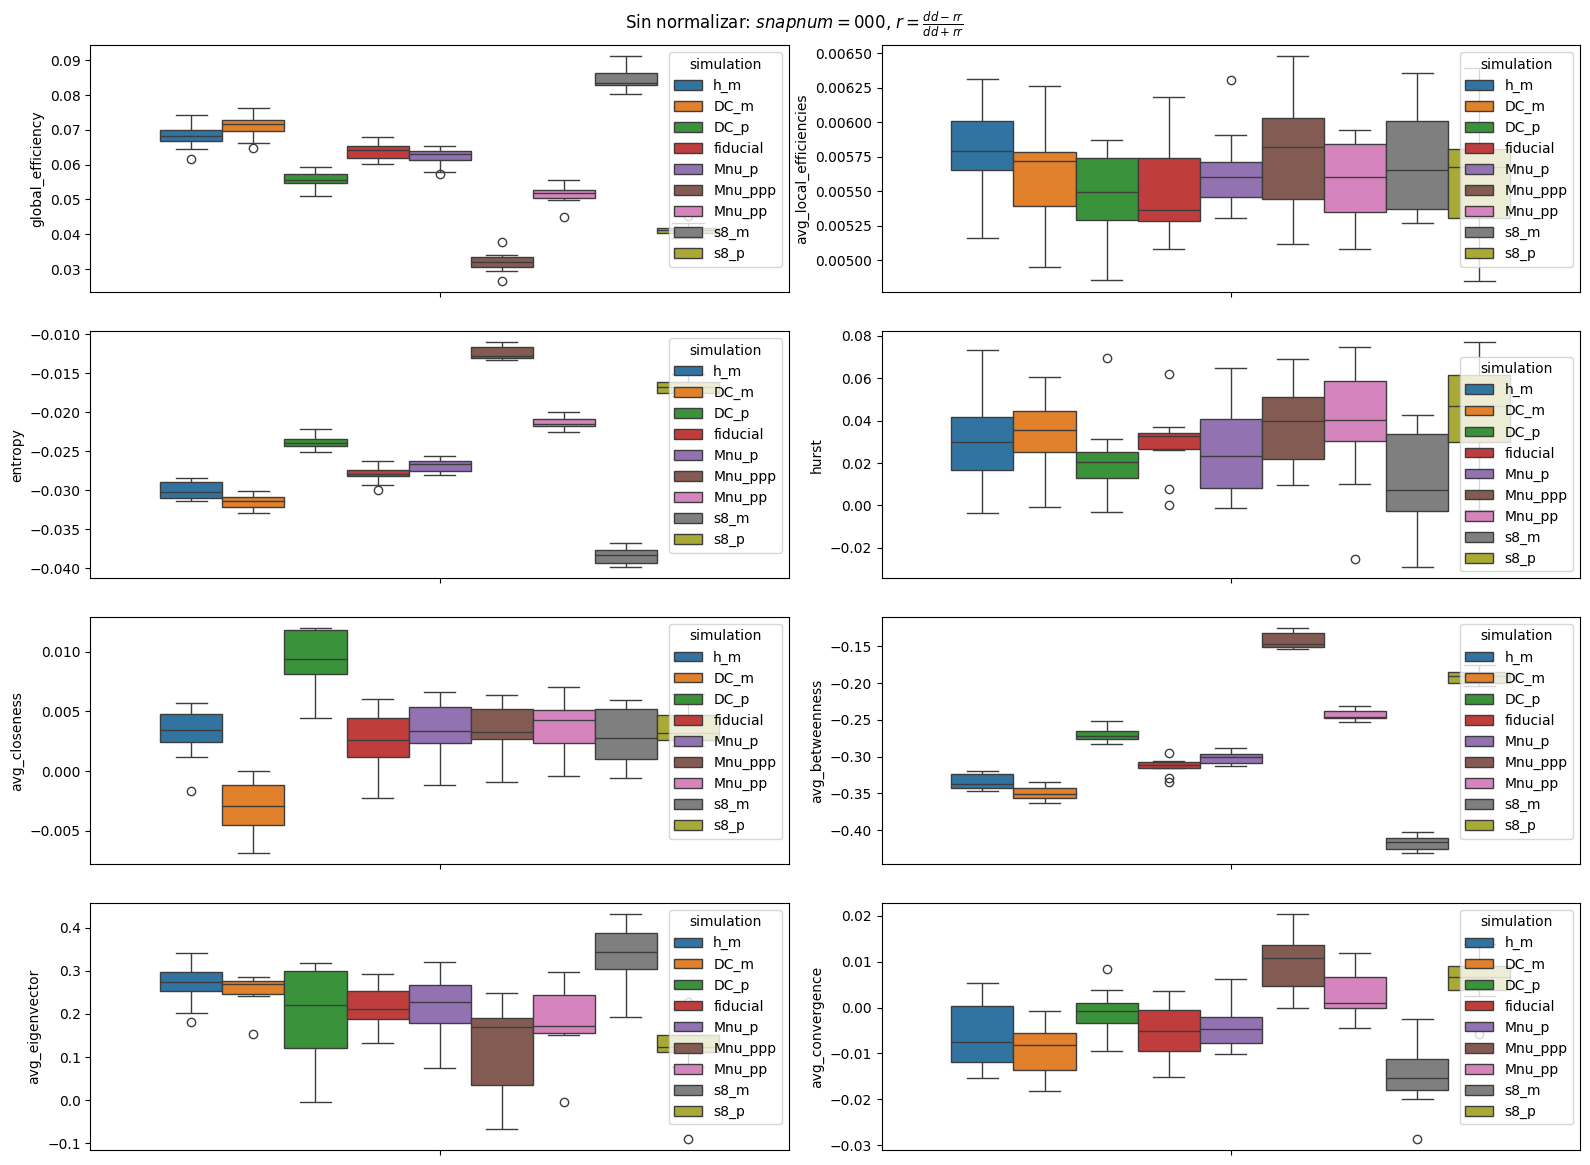

In [20]:
plot_ratio(df, "000", ratio_func2, r"Sin normalizar: $snapnum=000$, $r=\frac{dd - rr}{dd + rr}$")

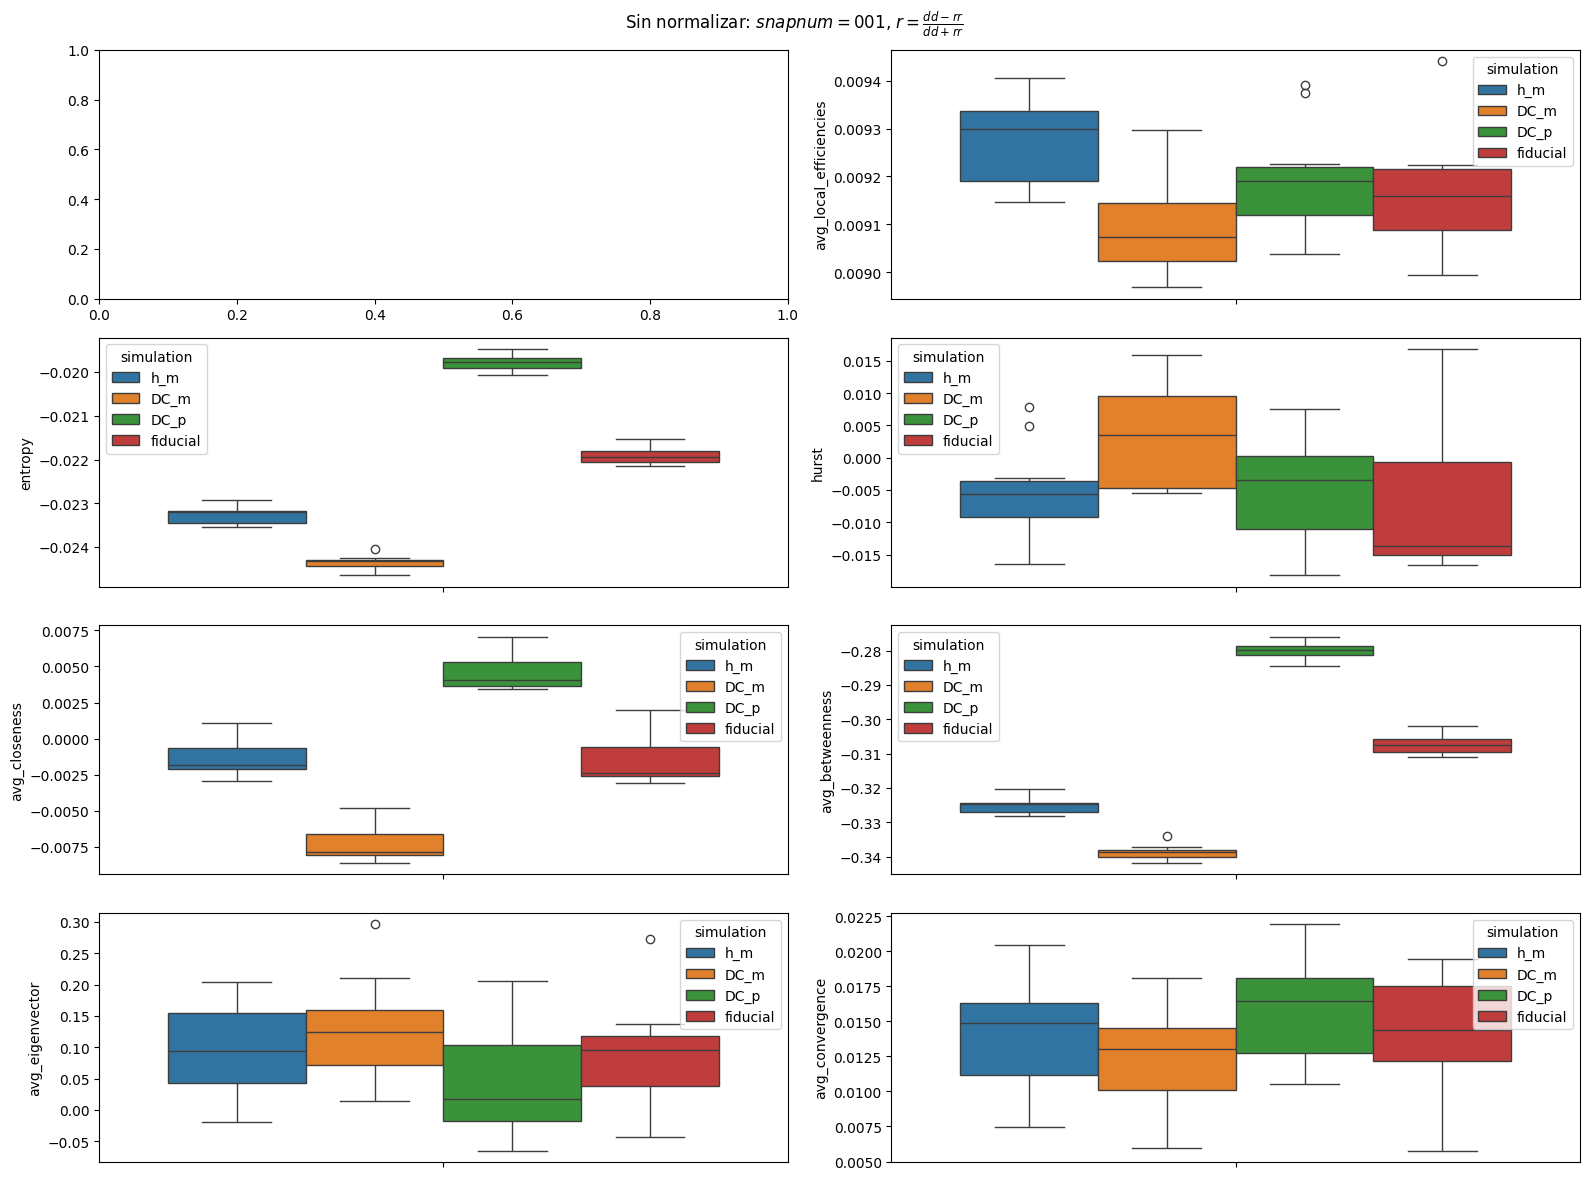

In [21]:
plot_ratio(df, "001", ratio_func2, r"Sin normalizar: $snapnum=001$, $r=\frac{dd - rr}{dd + rr}$")

## Normalizados

### Función del ratio: $r = \frac{dd}{rr}$

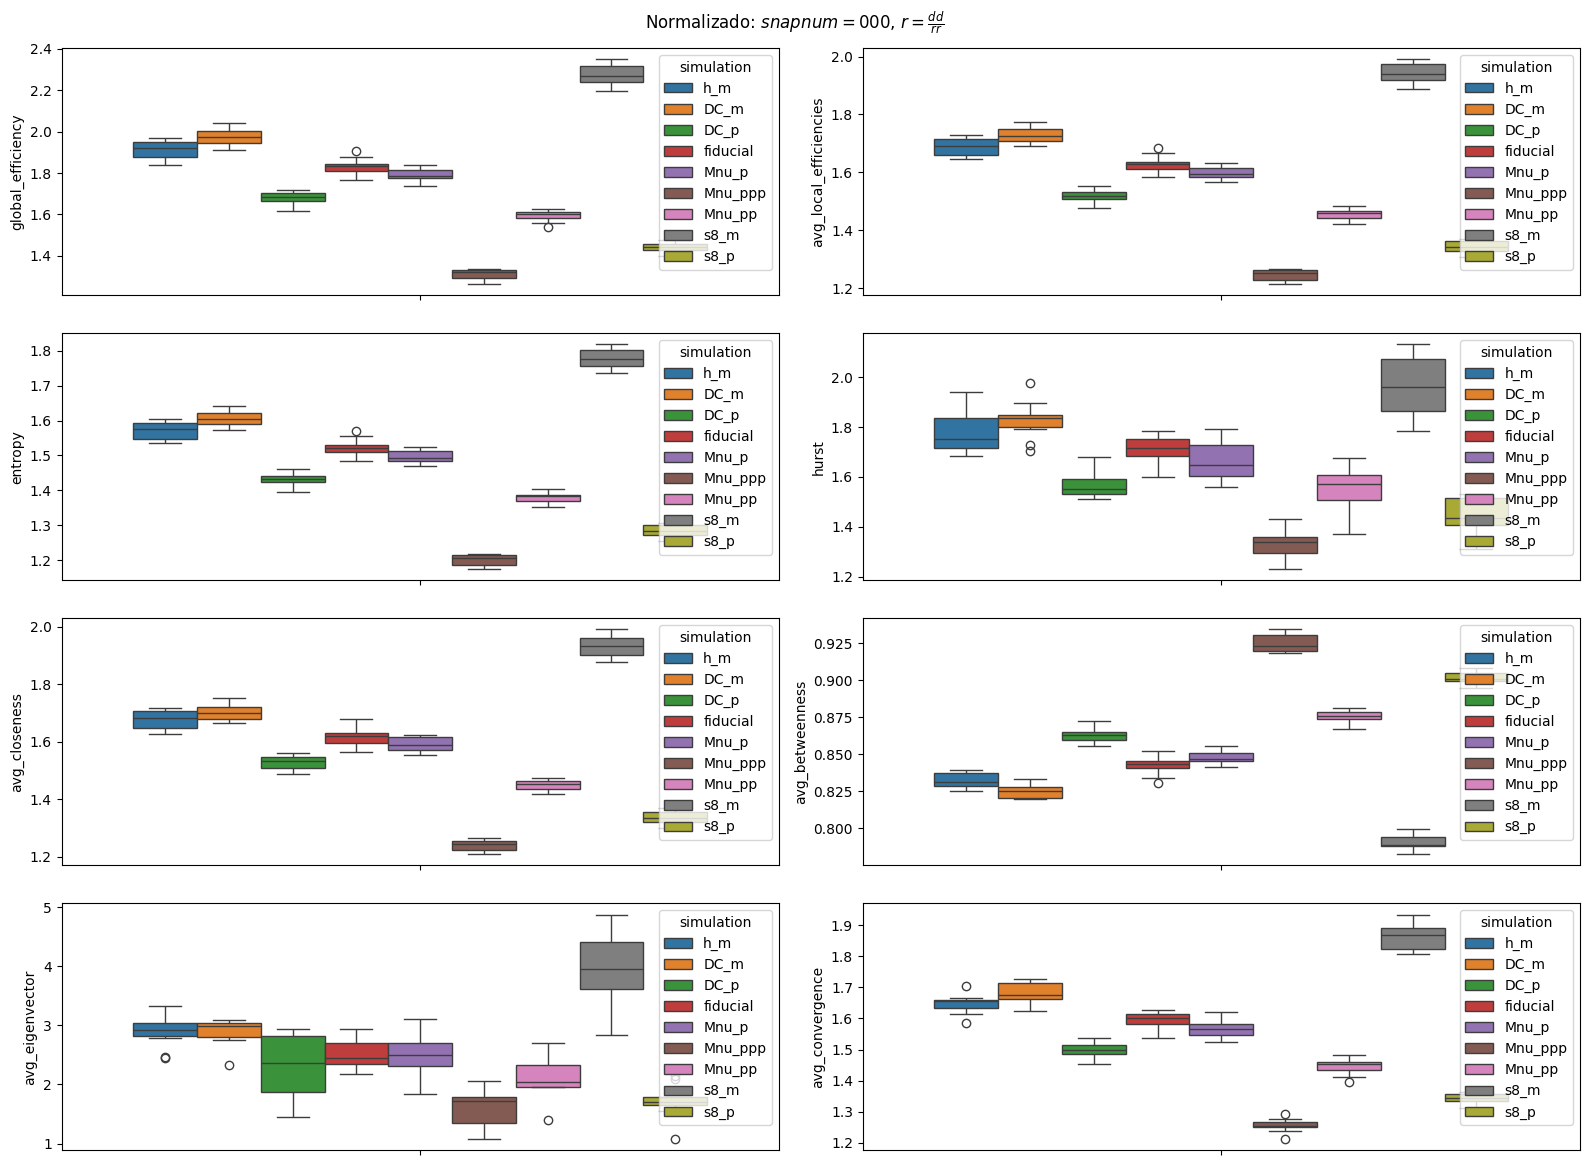

In [22]:
plot_ratio(normalized_df, "000", ratio_func1, r"Normalizado: $snapnum=000$, $r=\frac{dd}{rr}$")

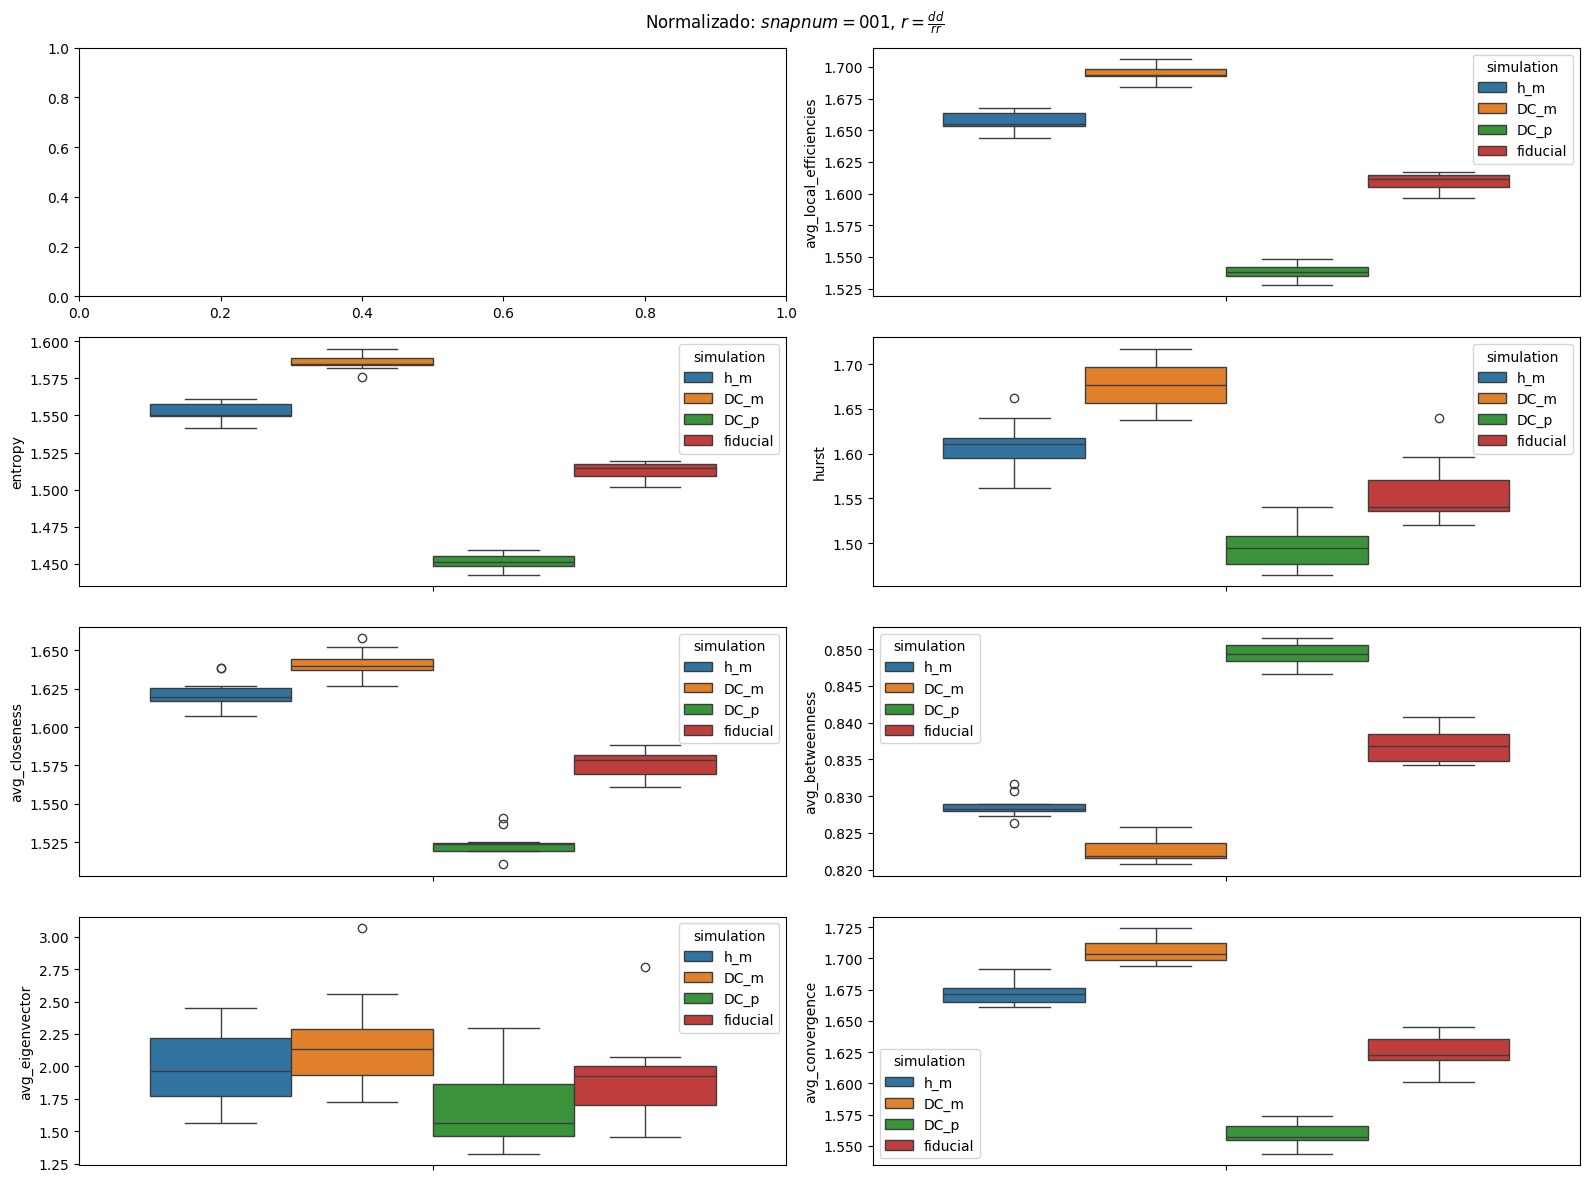

In [23]:
plot_ratio(normalized_df, "001", ratio_func1, r"Normalizado: $snapnum=001$, $r=\frac{dd}{rr}$")

### Función del ratio: $r = \frac{dd - rr}{dd + rr}$

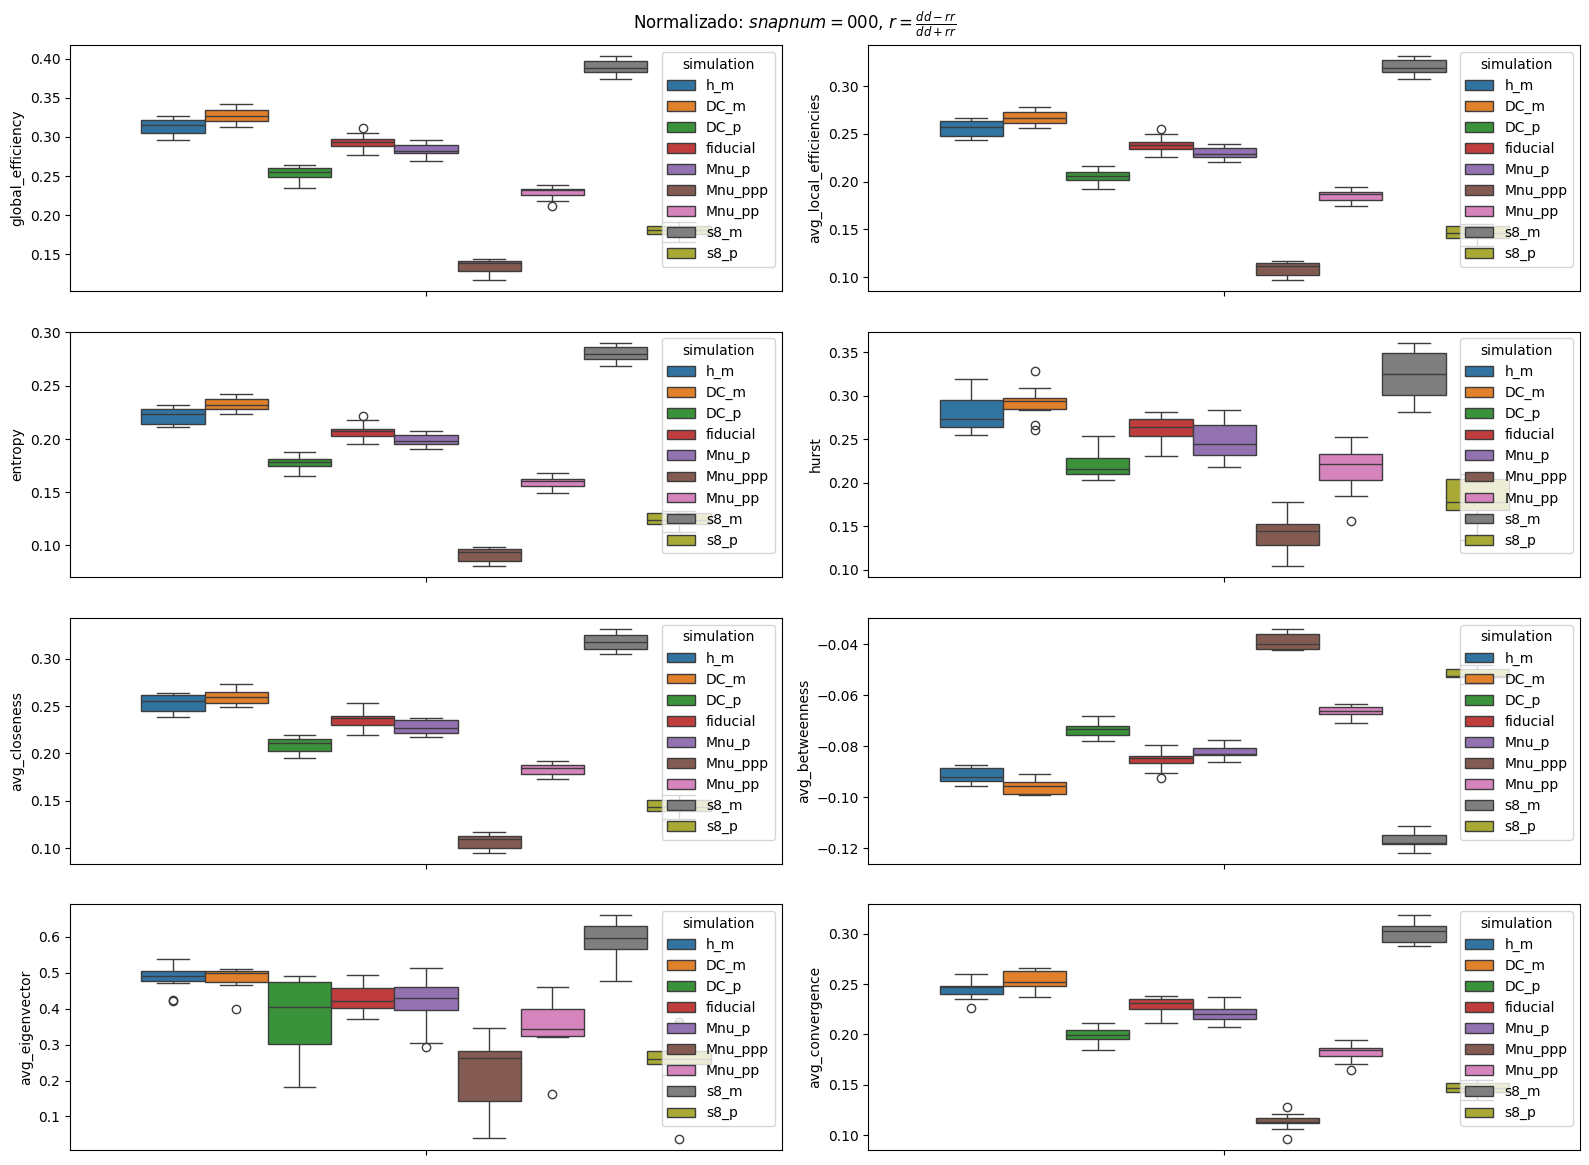

In [24]:
plot_ratio(normalized_df, "000", ratio_func2, r"Normalizado: $snapnum=000$, $r=\frac{dd - rr}{dd + rr}$")

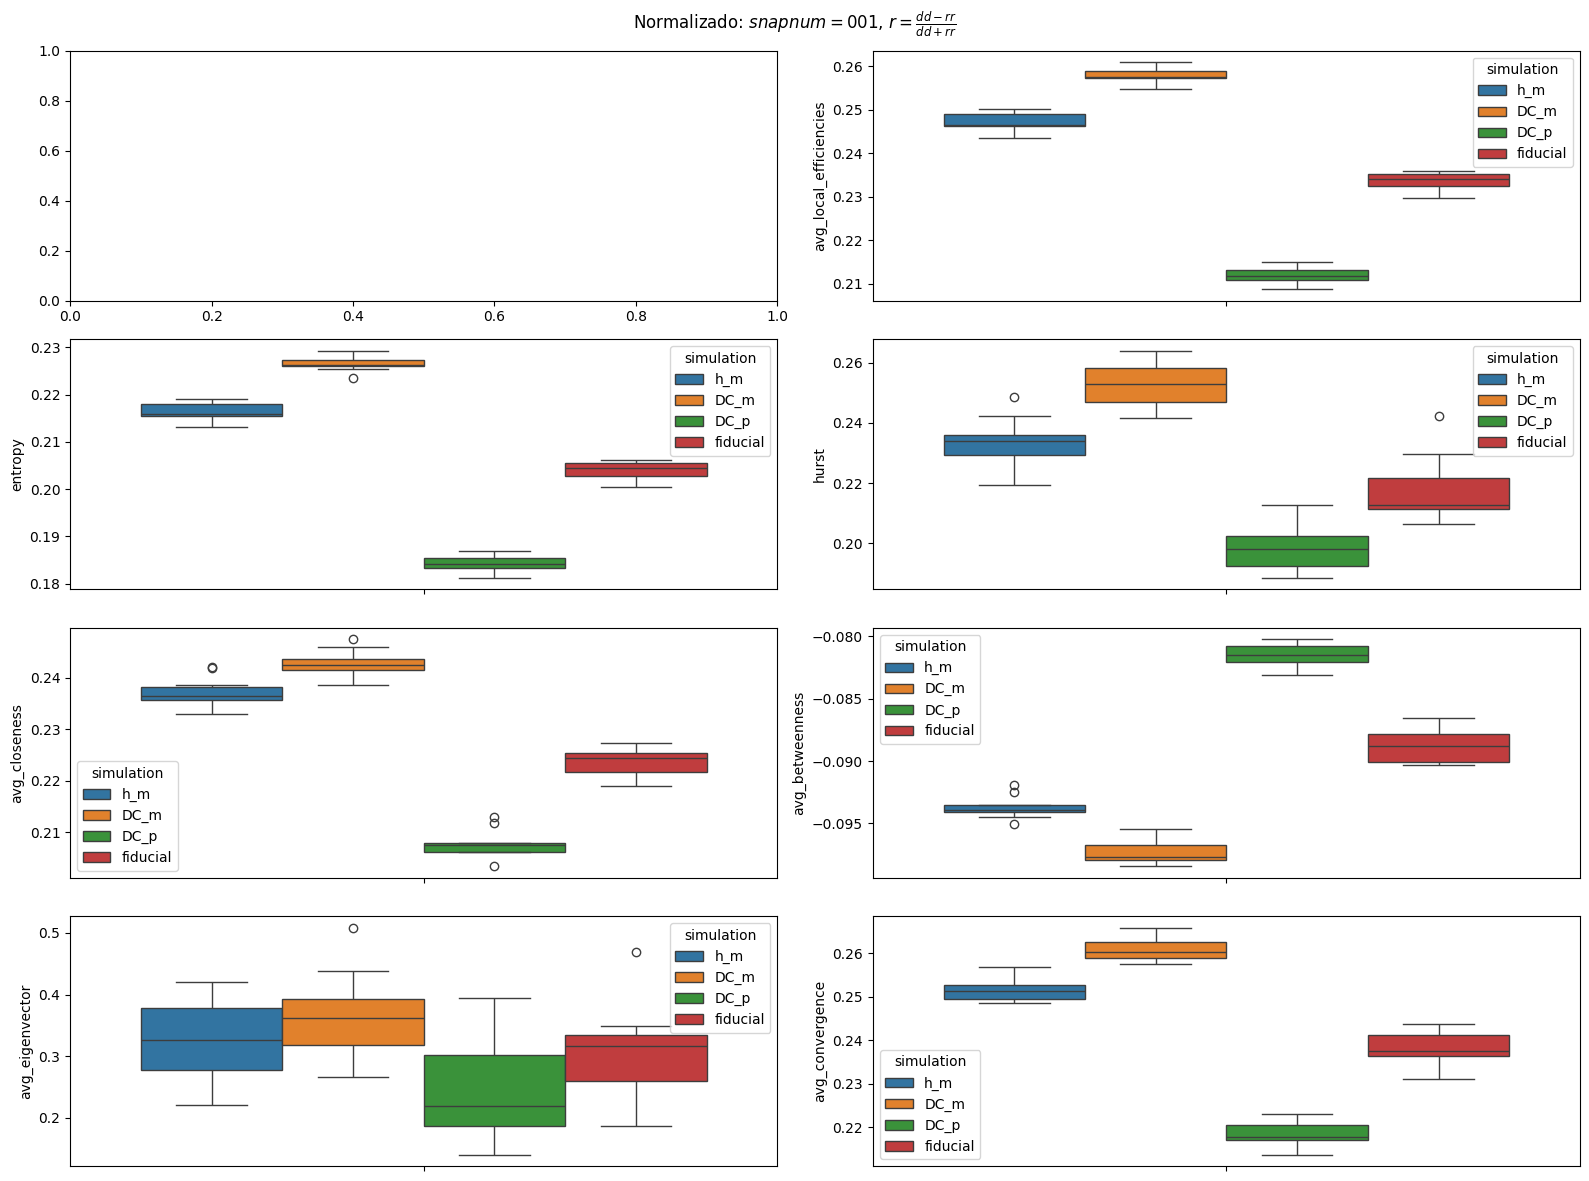

In [25]:
plot_ratio(normalized_df, "001", ratio_func2, r"Normalizado: $snapnum=001$, $r=\frac{dd - rr}{dd + rr}$")